In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt

2023-06-02 11:41:27.881279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
iris = load_iris()
x, y = iris.data, iris.target
print('x=', x)
print('y=', y)
print('x.shape original=', x.shape)

x= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1

In [3]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print('x.shape reshape after=', x.shape)
#print(unique(y))
#print(unique(y).sum())

x.shape reshape after= (150, 4, 1)


In [4]:
#split the data into the train and  20% for test part
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)

In [5]:
#define the model
model = Sequential()

2023-06-02 11:41:30.436785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 11:41:30.439306: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
#output filters=64,   kernel_size=2
#input_shape argument (tuple of integers or None, 
#e.g. (10, 128) for sequences of 10 vectors of 128-dimensional vectors
#in this example: (x0,x1,x2,x3) 4 column, 1 dimensional vector 
#x.shape reshape after= (150, 4, 1) then input_shape=(4,1)
layer_1 = Dense(16, input_shape=(4,1), activation="relu") # use Dense as input
#layer_1 = Conv1D(64, 2, activation="relu", input_shape=(4,1)) #use filter as layer_1 input 
model.add(layer_1)
#16 neurons
model.add(Dense(16, activation="relu"))
#model.add(MaxPooling1D())
model.add(Flatten())
# 3 type of output
model.add(Dense(3, activation = 'softmax'))

In [7]:
#compile the model
model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = "adam",  metrics = ['accuracy'])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4, 16)             32        
                                                                 
 dense_1 (Dense)             (None, 4, 16)             272       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [9]:
#fit the model with train data
model.fit(xtrain, ytrain, batch_size=16,epochs=100, verbose=0)

In [10]:
#calculate the loss and accuracy with train data
loss, accuracy = model.evaluate(xtrain, ytrain)
print("Loss:", loss, " Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9750
Loss: 0.16218847036361694  Accuracy: 0.9750000238418579


In [11]:
#calculate the loss and accuracy with test data
loss, accuracy = model.evaluate(xtest, ytest)
print("Loss:", loss, " Accuracy:", accuracy)

1/1 [==============================] - 0s 64ms/step - loss: 0.1519 - accuracy: 0.9667
Loss: 0.1519453376531601  Accuracy: 0.9666666388511658


In [12]:
#predict the test data
pred = model.predict(xtest)
#print(pred)
pred_y = pred.argmax(axis=-1)

1/1 [==============================] - 0s 217ms/step


In [13]:
#confusion matrix
cm = confusion_matrix(ytest, pred_y)
print('cm=',cm)

cm= [[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]


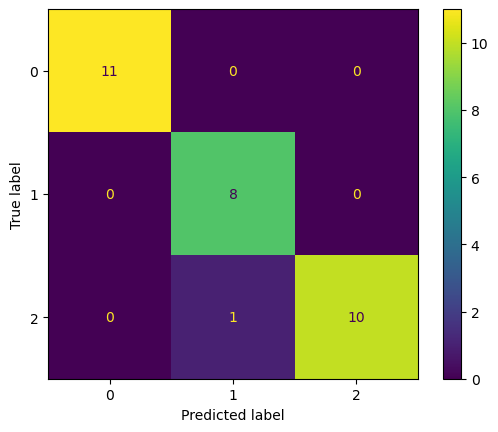

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()